<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/Travelling_Salesman_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descripcion del problema 

El Travelling Salesman Problem o mas conocido como el problema del vendedor viajero(TSP) es un problema de la categoria NP-hard es uno de los mas famosos problemas de dicha categoria. Este problema describe la busqueda de una ruta que pase por todos los puntos designados de la forma mas optima posible para al final retornar al mismo punto de salida, ejemplo de esto es la seleccion de una ruta de los repartidores de mensajeria o correos, que buscan la ruta mas optima para poder entregar todos los paquertes o cartas.

Este es un problema clasico dentro de los problemas de optimización un problema que recientemente aumento debido a la pandemia que nos afecto de gran manera hasta no hace mucho tiempo atras. 

Entonces podemos ver este problema de mejor forma con la siguiente imagen:

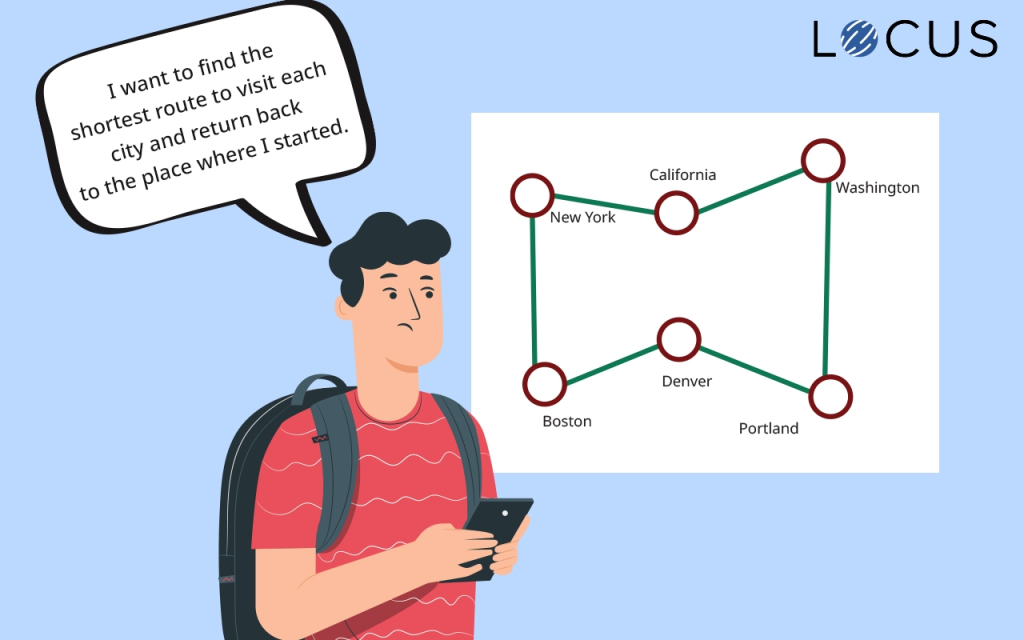

Y como este hay muchos ejemplos de la vida diaria y coas por el estilo.

# 2) Descripción del algoritmo

El algoritmo consistira de 2 partes, la primera es la parte greedy en la cual se genera una posible solucion optima y en la segunda parte aplicamos el algoritmo 2OPT para poder encontrar con mayor presicion la mejor solucion al problema buscando los mejores optimos locales.

## 2.1) algoritmo Greedy

Para este algoritmo tenemos la entrada de una matriz adjunta en la cual nos dan la cuidad o un lugar X junto a sus respectivos costos de aristas, entonces vamos recorriendo la matriz de forma tal que vamos comparando el valor inicial con las posibles rutas y cuando encuentra una candidata la guarda y sigue recorriendo la mistriz hasta finalmente encontrar la sulucion mas optima, este genera un "grafo" circular con los minimos costos posibles.

## 2.2) Algoritmo 2-change/2-OPT

El algoritmo 2-OPT lo que hace es despues de obtener un grafo circular o cerrado mejor dicho este toma 2 nodos arbitrarios, los cruza y vuelve a ver el costo total del grafo, esto lo hace las veces necesarias hasta encontrar el mas optimo, cabe mencionar que una vez realizado un cruce este puede volver a repertirse, estos cruces suelen hacerce hasta ya no tener mas opciones de cruces, esto se hace con el fin de encontrar la solucion mas optima, pero no necesariamente el ultimo cruce es el mas optimo puede ser uno anterior insuperable pero el algoritmo seguira hasta el final de todas formas.

# 3) Codigo

## 3.1) generador de instancias aleatorias

In [68]:
import numpy as np
from math import inf
import random
import matplotlib.pyplot as plt

In [69]:
def dist(c1, c2):
   return np.sqrt( (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 )

In [20]:
def generate_tsp_instance(n: int):
    """
        Input: cantidad de vértices.
        Output: una matriz de n x n. Cada posición M[i][j] dentro de la matriz indica la distancia que existe entre el vértice i y el vértice j.
    """
    cities = []
    for i in range(n):
        x, y = np.random.uniform(-100, 100), np.random.uniform(-100, 100)
        cities.append([x, y])
        
    instance = []
    for i, coord1 in enumerate(cities):
        instance.append([])
        for j, coord2 in enumerate(cities):
            if i != j:
                instance[i].append(dist(coord1, coord2))
            else:
                instance[i].append(0)
          
    return instance


## 3.2) TSP Greedy

In [85]:
def Tsp_greedy(G, verbose=False):
  def calculate_cost():
    cost = 0
    for i in range(n):
      cost += G[path[i]][path[i+1]]
    return cost
  n = len(G) 
  path = list()
  visited = dict()

  for i in range(n):
    visited[i] = False
  s = 0 
  path.append(s) 
  visited[s] = True 

  for i in range(n-1):
    min = inf 
    for j in range(n):          
      if not visited[j] and s != j:
        cost = G[s][j] 
        if cost < min:
          min = cost 
          nearest = j 
    path.append(nearest) 
    visited[nearest] = True 
    s = nearest 

  path.append(path[0]) 
  cost = calculate_cost() 


  return path, cost

In [82]:
graph = generate_tsp_instance(10)
path, cost = Tsp_greedy(graph)
print("Tour: ", path)
print("Costo: ", cost)

Tour:  [0, 4, 3, 9, 1, 7, 5, 8, 6, 2, 0]
Costo:  768.7097213313139


## 3.3) 2-Change

In [86]:
def Tsp_2opt(G, verbose=False):
  def calculate_cost(): # calculamos el costo del tour 
    cost = 0
    for i in range(n):
      cost += G[path[i]][path[i+1]]
    return cost

  n = len(G) # Definimos la cntidad de vertices
  path = list(range(n))
  random.shuffle(path)
  path.append(path[0])

  while True:
    max_change = 0 
    max_i = 0
    max_j = 0

    for i in range(n-2):
      for j in range(i+2, n-1):
        current = G[path[i]][path[i+1]] + G[path[j]][path[j+1]] 
        new = G[path[i]][path[j]] + G[path[i+1]][path[j+1]] 
        change = current - new 
        if change > max_change:
          max_change = change 
          max_i = i 
          max_j = j

    if max_change == 0: break

    path[max_i+1:max_j+1] = path[max_i+1:max_j+1][::-1]

  cost = calculate_cost() 

  return path, cost 

In [81]:
graph = generate_tsp_instance(10)
path, cost = Tsp_2opt(graph)
print("Tour: ", path)
print("Costo: ", cost)

Tour:  [3, 9, 4, 6, 1, 2, 5, 8, 7, 0, 3]
Costo:  573.8235643405628


# 4) Tiempo de ejecucion

**Teorema 1**: Tiempo de ejecución del algoritmo 2-OPT
Cada movimiento o iteración del algoritmo de búsqueda local* (2-OPT) tiene un un tiempo de ejecución $O(n^2)$*

**Prueba del Teorema:**
El movimiento local del algoritmo se define como el intercambio entre dos pares de arcos mediante la operación 2-change. Para encontrar cuál es el movimiento que disminuye más el costo del tour, es necesario verificar cada intercambio posible entre los arcos del grafo, por cada iteracion del mismo.





Cada arco $(v_{i}, v_{i+1})$ con $i = 0 \dots n-3$, se puede intercambiar con el arco $(v_{j}, v_{j+1})$ con $j = i+2 \dots n-2$, lo cual resulta en $O(n^2)$ permutaciones posibles. Una vez encontrado el intercambio que minimiza el costo del tour, se reacomodan los vértices en el arreglo en un tiempo $O(n)$.


 

Por lo tanto, el tiempo de ejecución de cada movimiento u operación 2-change es $O(n^2)$.

# 5) Experimento

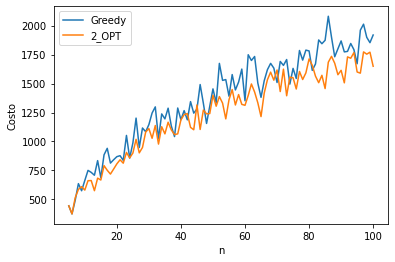

In [87]:
x=[]; y1=[]; y2=[]

for n in range(5,101):
  graph = generate_tsp_instance(n)
  cost_greedy = Tsp_greedy(graph)[1] 
  cost_2opt = Tsp_2opt(graph)[1]

  x.append(n)
  y1.append(cost_greedy)
  y2.append(cost_2opt)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Greedy", "2_OPT"])

plt.xlabel('n')
plt.ylabel('Costo')
plt.show()
     

Como se puede apreciar en el grafico resultante, el algoritmo 2-OPT ofrece un menor costo a la hora de resolver instancias aleatorias, por lo que podemos decir que corresponde a la version mas optima entre estas 2 soluciones, ademas hay que recalcar que como se muestra en la prueba de timepo de ejecuccion estas curvas son cuadraticas como corresponde a este tipo de problemas.